## Distributions

A wide range of probability distributions are available in <tt>scipy.stats</tt>. They all have a generic structure <tt>scipy.stats.&lt;distribution&gt;</tt>, where the distribution name is best looked up in the scipy.stats documentation.

Each distribution can be initialised like

  <tt>dist = scipy.stats.&lt;distribution&gt;(&lt;parameters&gt;)</tt>

so for a normal distribution with mean 0.4 and width 1.5 we would write
  <tt>n = scipy.stats.norm(0.4, 1.5) </tt>

The <tt>dist</tt> variable can then be used to get values from the probability distribution function (PDF) using the <tt>pdf</tt> function or draw samples from the PDF using the <tt>rvs</tt> function. Note that for <em>discrete</em> distributions (e.g. Poisson, Binominal, Multinominal) the correct quantity is the probability mass function (PMF) and the routine is called <tt>pmf</tt>. The cumulative distribution function (CDF) can be accessed using the <tt>cdf</tt> function and a wide range of other functionalities are available. Here I will just show the basic usage of a few of these distributions

In [24]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# This modifies the frozen distributions so that I can get its name for plotting purposes.
ss.distributions.rv_frozen.name = property(lambda self: self.dist.name)

In [26]:
def plot_distribution(d, xmin, xmax):
    """
    Create a simple plot of the PDF and CDF of a distribution.
    I will use this frequently below. 
    """
    x = np.linspace(xmin, xmax, num=100)
    
    # I do not know whether the distribution is discrete or not. A simple way to check
    # is to use a try except clause (this is not fool-proof though since if d is not a 
    # distribution it will fail.)
    try:
        y_pdf = d.pdf(x)
        discrete = False
    except:
        # Ok, a discrete sample - then we want x to contain integers
        x = np.arange(xmin, xmax+1)
        y_pdf = d.pmf(x)
        discrete = True
        
    y_cdf = d.cdf(x)

    f, ax = plt.subplots(1, 2)
    plt.tight_layout(w_pad=1.5, h_pad=1.0)
    
    if discrete:
        ax[0].plot(x, y_pdf, 'ro-')
    else:
        ax[0].plot(x, y_pdf, 'r-')
    ax[0].set_title(d.name+' - PDF')
    ax[0].set_ylim(0, 1.1*np.nanmax(y_pdf))
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('p(x)')
    ax[1].plot(x, y_cdf, 'b-')
    ax[1].set_title(d.name+' - CDF')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('p(>x)')

## The Uniform distribution

This is the simplest distribution around. It is simply constant in a range.

<b>Parameters</b>: Left side of range and Width of range.

So to set up a uniform distribution between 1 and 5, we can do:

In [27]:
left = 1.0
width = 4.0
u = ss.uniform(left, width)

Next, I would like to plot the distribution. To do this I first create a variable x
for the locations I want to have an estimate of the PDF and the CDF. Note that I plot the PDF on the left and the CDF on the right. Note that the edges on the PDF are not perfectly vertical - due to the finite sampling on the x-axis.

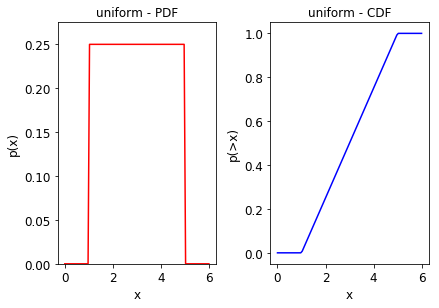

In [28]:
plot_distribution(u, 0, 6)

Next, let us draw 100 random variables from the distribution. 

Sample mean=2.970


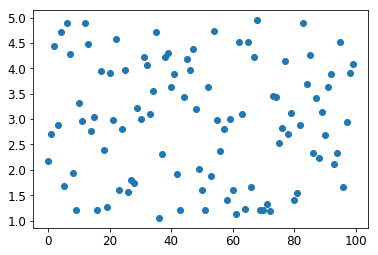

In [29]:
r_x = u.rvs(100)
plt.plot(r_x, 'o')
print("Sample mean={0:.3f}".format(np.mean(r_x)))

The uniform distribution is particularly useful if your variable has a particularly weird distribution that is not supported by a standard distribution. If a value $y$ can be written as $\Phi(x)$, then the distribution of $y$ is given by $p_Y(y) = p_X(\Phi^{-1}(y)) \left|\frac{d\Phi^{-1}(y)}{dy}\right|$

Here I have added a subscript $X$ and $Y$ to highlight which distribution we are talking about. To take a specific example, let us assume that $y = \sqrt{x}$ with $x$ taken from the uniform distribution above we have $x = \Phi^{-1}(y) = y^2$ and the derivative is then $2y = 2\sqrt{x}$ so we get

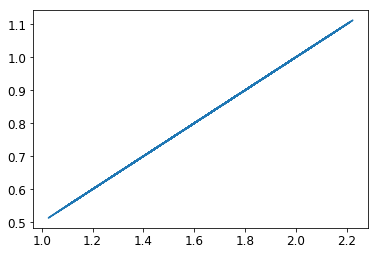

In [30]:

y_sqrt = 2*np.sqrt(r_x)*u.pdf(r_x)
plt.plot(np.sqrt(r_x), y_sqrt)

There are quite a few other functions you might find useful in this package. Here are the functions to calculate the mean, the 0.1 quantile and the standard deviation.

In [31]:
u.mean(), u.ppf(0.1), u.std()

(3.0, 1.4, 1.1547005383792515)

## The normal distribution

Arguably the most frequently encountered distribution is the normal distribution - in part this is due to the central limit theorem. This is defined through

$$p(x|\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(x-\mu)^2/2\sigma^2}$$

where $\mu$ is the mean and $\sigma$ is the standard deviation ("width") of the distribution - this is often written as $N(\mu, \sigma^2)$ because the variance, $\sigma^2$, often is more convenient for calculations

The normal distribution is called <tt>norm</tt> in <tt>scipy.stats</tt>, and to create a Gaussian distribution with $\mu=3.5$ and $\sigma=1.8$ we can do:

In [32]:
n = ss.norm(3.5, 1.8)

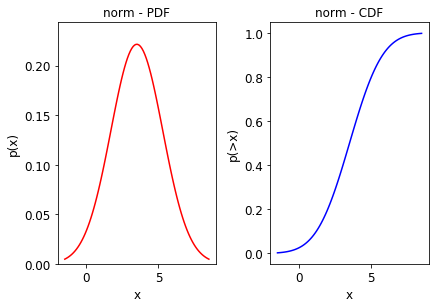

In [33]:
plot_distribution(n, 3.5-5, 3.5+5)

Let us now assume that we now take 1000 observations of the same (non-variable) star. The true value is going to be 5 and the noise is taken to to be 1.0 so that we have a S/N of 5, I will then transform these fluxes to magnitudes and compare the distributions.

In [34]:
n = ss.norm(5.0, 1.0)
fluxes = n.rvs(1000)
magnitudes = -2.5*np.log10(fluxes)

Text(0, 0.5, 'p(m)')

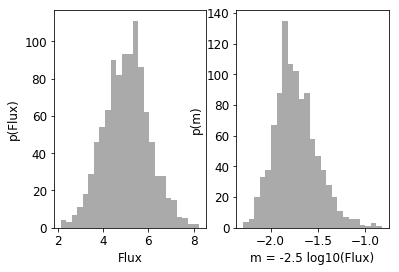

In [35]:
f, ax = plt.subplots(1, 2)

h1 = ax[0].hist(fluxes, bins=25, color='#aaaaaa')
ax[0].set_xlabel('Flux')
ax[0].set_ylabel('p(Flux)')
h2 = ax[1].hist(magnitudes, bins=25, color='#aaaaaa')
ax[1].set_xlabel('m = -2.5 log10(Flux)')
ax[1].set_ylabel('p(m)')

<b>Try</b>: Modify the code above to overplot the theoretically expected distributions on each panel in red.

## The Poisson distribution

The expected number of photons in a given period of time is distributed as a Poisson distribution and quite a few other quantities in astronomy. Thus it is a very useful distribution to know as well. It is defined mathematically as 

 $$p(k|\lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$
 
 and the Python function requires one parameter - the mean, $\lambda$. The mode of the distribution is then given by $\lambda-1$ and the standard deviation as $\sqrt{\lambda}$ - and other statistical quantities can also be derived from $\lambda$.

In [36]:
p = ss.poisson(4)

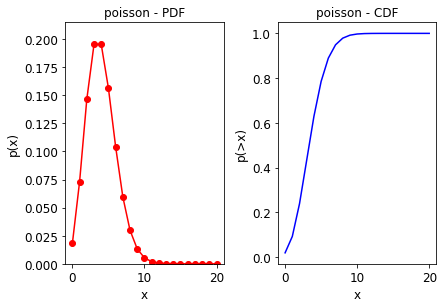

In [37]:
plot_distribution(p, 0, 20)

Sample mean=3.920


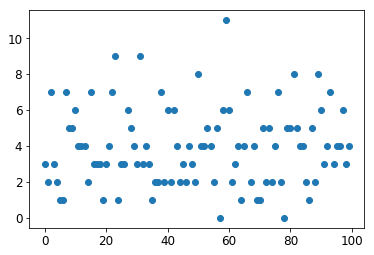

In [38]:
r_x = p.rvs(100)
plt.plot(r_x, 'o')
print("Sample mean={0:.3f}".format(np.mean(r_x)))

## The Exponential & Laplace distribution

This distribution is defined through 

$$p(x|\mu, \sigma) = \frac{1}{2\sigma} e^{-|x-\mu|/\sigma} $$

This distribution when defined for all $x$ is often referred to as the Laplace distribution. If the distribution is confined to $x-\mu>0$, it is often called the exponential distribution.  In <tt>scipy.stats</tt> the Laplace distribution is implemented in the <tt>laplace</tt> function  and the exponential in the <tt>expon</tt> function. 

In [39]:
e = ss.expon(3.5, 2.0)
l = ss.laplace(3.5, 2.0)

In [40]:
x = np.linspace(-3, 10, num=100)